## 데이터 확인 및 전처리

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./pima_diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# 0은 음성, 1은 양성
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.isna().sum() # null 값은 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()  # min 값이 0이 말이 안되는데 0인 경우들이 존재

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 0 값 평균으로 대체

In [6]:
df.loc[df.Glucose == 0, 'Glucose'] = df.Glucose.mean()
df.loc[df.BloodPressure == 0, 'BloodPressure'] = df.BloodPressure.mean()
df.loc[df.SkinThickness == 0, 'SkinThickness'] = df.SkinThickness.mean()
df.loc[df.Insulin == 0, 'Insulin'] = df.Insulin.mean()
df.loc[df.BMI == 0, 'BMI'] = df.BMI.mean()

In [7]:
df.loc[df.BloodPressure == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
feature = df.iloc[:,:-1]
target = df['Outcome']

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.25, stratify=target, random_state=777)

## 모델 별 학습 & 예측

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

knn_clf = KNeighborsClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
knn_clf.fit(x_train, y_train)
lr_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

knn_pred = knn_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)

print(f'KNN 정확도:{accuracy_score(y_test, knn_pred)}')
print(f'Logistic Regression 정확도:{accuracy_score(y_test, lr_pred)}')
print(f'Random Forest 정확도:{accuracy_score(y_test, rf_pred)}')

KNN 정확도:0.734375
Logistic Regression 정확도:0.7552083333333334
Random Forest 정확도:0.7447916666666666


c:\users\clee0\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 정밀도 & 재현율 확인

### Confusion Matrix 확인

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [15]:
cm = confusion_matrix(y_test, knn_pred)

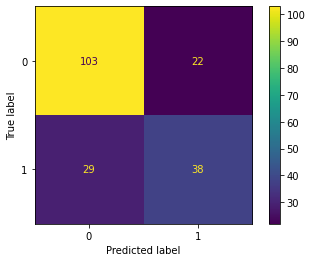

In [16]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### 정밀도, 재현율, F1, ROC, AUC

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [18]:
knn_clf.predict_proba(x_test)[:,1]

array([0.2, 0. , 0.2, 0.4, 0. , 0.2, 0.4, 0.8, 0.2, 0.6, 0. , 0.4, 1. ,
       0. , 0.6, 0.2, 0.4, 1. , 0.8, 0.8, 1. , 0.2, 0. , 0.8, 0.4, 0. ,
       0.4, 0.8, 0.2, 0.2, 0.2, 0.4, 0. , 0. , 0.8, 0.2, 0. , 0.4, 0.4,
       1. , 0.2, 1. , 0. , 0.6, 0.2, 0. , 0.8, 1. , 0.8, 0.6, 0.2, 0.4,
       0.6, 0.4, 0.6, 0.2, 1. , 0.8, 0. , 0. , 0. , 0.2, 0.8, 0.8, 0. ,
       0.8, 0.8, 0.2, 0. , 0.6, 0. , 0.2, 0.2, 0.6, 0. , 0.2, 0.4, 0. ,
       0.4, 0.2, 0.4, 0.4, 0.8, 0.4, 0. , 0.4, 0.4, 0.2, 0. , 0. , 1. ,
       0.6, 0.2, 0. , 0.4, 0.6, 0.2, 0.4, 0.4, 0.6, 0.2, 0. , 0.6, 0. ,
       0.2, 0.8, 0.2, 0.6, 0.2, 0.6, 0.2, 0.2, 0.6, 0. , 0. , 0. , 0.4,
       0.4, 0.4, 0. , 1. , 0.4, 0. , 0.4, 1. , 0.2, 0.6, 0.2, 0. , 0. ,
       0.8, 0.4, 0.4, 0.8, 0.2, 0. , 1. , 0. , 1. , 0.2, 0.4, 0. , 0.2,
       0.6, 0.6, 0.4, 0. , 0.6, 0.2, 0.2, 0.6, 0.4, 0. , 0.8, 0.2, 0.2,
       0. , 0.6, 0.4, 0. , 0.2, 0.8, 0.4, 0.2, 0.2, 0. , 0. , 0. , 0.4,
       0. , 0.8, 0. , 0. , 0.4, 0. , 0.2, 0.6, 0.4, 0. , 1. , 0.

In [19]:
def get_eval(classifier, x_test, y_test):
    pred = classifier.predict(x_test)
    pred_proba = classifier.predict_proba(x_test)[:,1]
    
    fpr, tpr, threshold = roc_curve(y_test, pred_proba)
    plt.plot(fpr , tpr, label='ROC')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    
    plt.show()
    
    print(f'정확도 : {accuracy_score(y_test, pred):.4f}')
    print(f'정밀도 : {precision_score(y_test, pred):.4f}')
    print(f'재현율 : {recall_score(y_test, pred):.4f}')
    print(f'F1 : {f1_score(y_test, pred):.4f}')
    print(f'AUC : {roc_auc_score(y_test, pred):.4f}')
    print()

KNN 결과


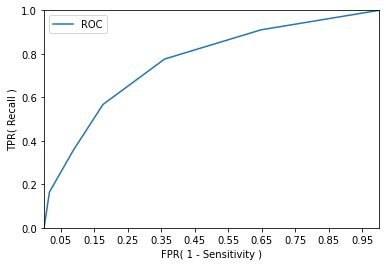

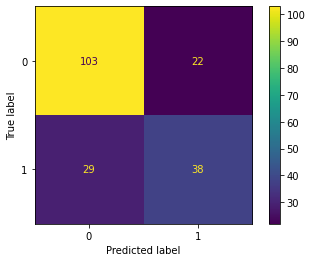

정확도 : 0.7344
정밀도 : 0.6333
재현율 : 0.5672
F1 : 0.5984
AUC : 0.6956

Logistic Regression 결과


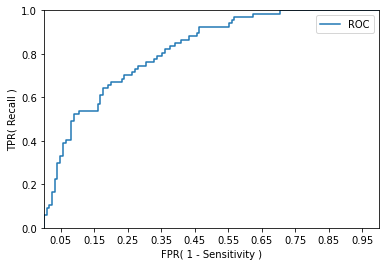

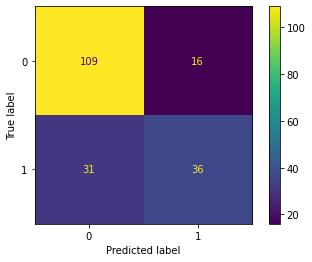

정확도 : 0.7552
정밀도 : 0.6923
재현율 : 0.5373
F1 : 0.6050
AUC : 0.7047

Random Forest 결과


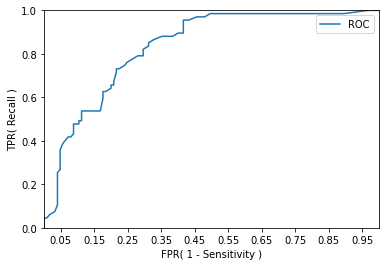

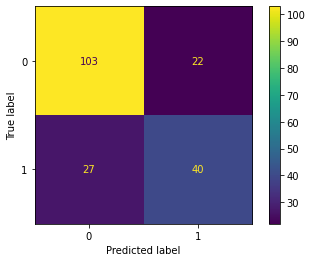

정확도 : 0.7448
정밀도 : 0.6452
재현율 : 0.5970
F1 : 0.6202
AUC : 0.7105



In [20]:
print("KNN 결과")
get_eval(knn_clf, x_test, y_test)

print("Logistic Regression 결과")
get_eval(lr_clf, x_test, y_test)

print("Random Forest 결과")
get_eval(rf_clf, x_test, y_test)

## 임계값(Threshold)에 따른 평가
**Logistic Regression 기반 실습**

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(feature)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, target, test_size=0.25, stratify=target, random_state=777)

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)

### precision recall 그래프 확인

In [22]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, pred_proba[:,1])

In [23]:
print(precision.shape)
print(threshold.shape)

(156,)
(155,)


In [24]:
threshold.shape[0]

155

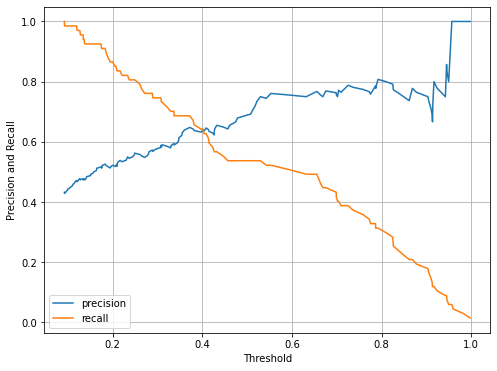

In [25]:
plt.figure(figsize=(8,6))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
#start, end = plt.xlim()
#plt.xticks(np.round(np.arange(start, end, 0.1),2))

plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.legend()
plt.grid()
plt.show()

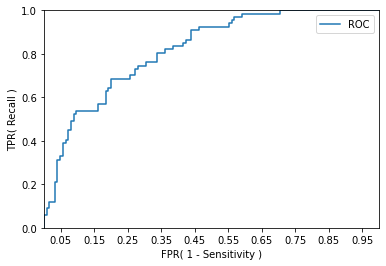

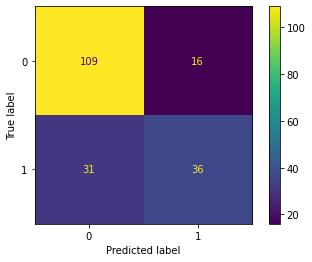

정확도 : 0.7552
정밀도 : 0.6923
재현율 : 0.5373
F1 : 0.6050
AUC : 0.7047



In [26]:
get_eval(lr_clf, x_test, y_test)

# 일단 피처스케일링만으로는 큰 변화가 일어나지 않았다...

In [29]:
from sklearn.preprocessing import Binarizer

thresholds = [0.5, 0.46, 0.42, 0.38, 0.34, 0.3]
pred_proba2 = pred_proba[:,1].reshape(-1,1)

for i in thresholds:
    binarizer = Binarizer(threshold=i).fit(pred_proba2) 
    self_pred = binarizer.transform(pred_proba2)
    print(f'Threshold : {i}')
    
    print(f'정확도 : {accuracy_score(y_test, self_pred):.4f}')
    print(f'정밀도 : {precision_score(y_test, self_pred):.4f}')
    print(f'재현율 : {recall_score(y_test, self_pred):.4f}')
    print(f'F1 : {f1_score(y_test, self_pred):.4f}')
    print(f'AUC : {roc_auc_score(y_test, self_pred):.4f}')
    print()

Threshold : 0.5
정확도 : 0.7552
정밀도 : 0.6923
재현율 : 0.5373
F1 : 0.6050
AUC : 0.7047

Threshold : 0.46
정확도 : 0.7396
정밀도 : 0.6545
재현율 : 0.5373
F1 : 0.5902
AUC : 0.6927

Threshold : 0.42
정확도 : 0.7344
정밀도 : 0.6290
재현율 : 0.5821
F1 : 0.6047
AUC : 0.6990

Threshold : 0.38
정확도 : 0.7500
정밀도 : 0.6377
재현율 : 0.6567
F1 : 0.6471
AUC : 0.7284

Threshold : 0.34
정확도 : 0.7292
정밀도 : 0.5974
재현율 : 0.6866
F1 : 0.6389
AUC : 0.7193

Threshold : 0.3
정확도 : 0.7240
정밀도 : 0.5814
재현율 : 0.7463
F1 : 0.6536
AUC : 0.7291

